# matplotlib

matplotlib.pyplot是使matplotlib像MATLAB一样工作的命令样式函数的集合。 每个pyplot功能可以改变一个数字：例如，创建一个数字，在图中创建一个绘图区域，在绘制区域绘制一些线条，用标签等来绘制图形。

matplotlib.pyplot在函数调用中保留各种状态，以便跟踪当前图形和绘图区域的内容，绘图功能将定位到当前轴（请注意，这里和大多数位置中的“轴” 文档是指图中的轴部分，而不是多个轴的严格数学项）。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import *  
# 定义自定义字体，文件名从1.b查看系统中文字体中来  
myfont = FontProperties(fname='/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc')  
# 解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus']=False

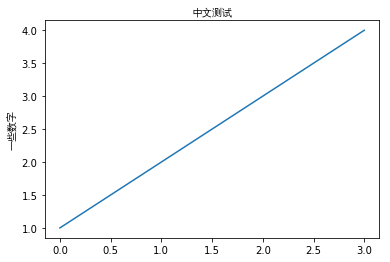

In [2]:
plt.plot([1,2,3,4])             #默认X轴为[0,1,2,3]
plt.ylabel(u'一些数字',fontproperties=myfont)
plt.title(u'中文测试',fontproperties=myfont)  
plt.show()

你可能想知道为什么x轴的范围是从0-3和y轴从1-4。 如果您向plot（）命令提供单个列表或数组，则matplotlib假定它是一系列y值，并为您自动生成x值。 由于python范围从0开始，默认x向量的长度与y的长度相同，而是以0开始。因此x数据为[0,1,2,3]。

plot（）是一个通用的命令，并且会占用任意数量的参数。 例如，要绘制x对y，可以发出命令：

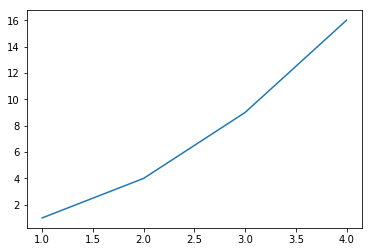

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

对于每个x，y对参数，有一个可选的第三个参数，它是格式字符串，表示绘图的颜色和线型。 格式字符串的字母和符号来自MATLAB，并将颜色字符串与线型字符串连接起来。 默认的格式字符串是“b-”，它是一条实线的蓝线。 例如，要用红色圆圈绘制上面的内容，您将发布

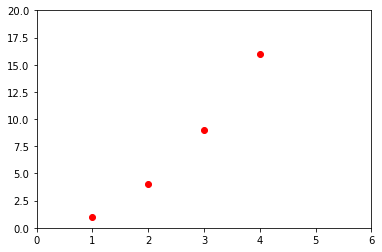

In [11]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])                         #设置坐标范围
plt.show()

请参阅plot（）文档以获取行样式和格式字符串的完整列表。 上述示例中的axis（）命令采用[xmin，xmax，ymin，ymax]的列表，并指定轴的视口。

如果matplotlib被限制在使用列表，这对于数字处理将是无用的。 一般来说，你将使用numpy数组。 事实上，所有的序列都在内部转换为numpy数组。 下面的例子说明了使用数组在一个命令中绘制不同格式样式的几行。

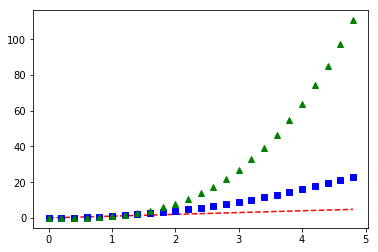

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# Controlling line properties控制线属性

行有很多属性可以设置：线宽，破折号风格，抗锯齿等; 请参阅matplotlib.lines.Line2D。 有几种方法设置行属性

http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D

#### 关键字控制

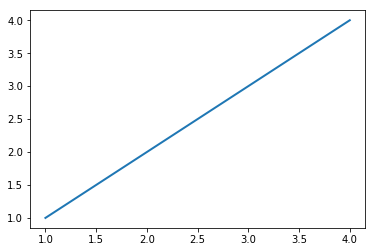

In [14]:
plt.plot([1,2,3,4], [1,2,3,4], linewidth=2.0)

#### 使用Line2D实例的setter方法。 plot返回一个Line2D对象的列表; 例如，line1，line2 = plot（x1，y1，x2，y2）：

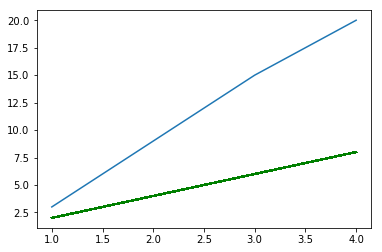

In [15]:
line1,line2 = plt.plot([1,2,3,4], [2,4,6,8],'g-',[1,2,3,4], [3,9,15,20],'-')
line1.set_antialiased(False)    # 关闭锯齿

#### 使用setp（）命令。 下面的示例使用MATLAB样式命令在行列表上设置多个属性。 setp透明地使用对象或单个对象的列表。 您可以使用python关键字参数或MATLAB风格的字符串/值对：

[None]

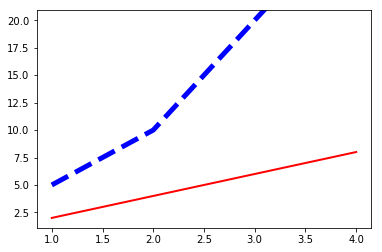

In [17]:
line1,line2 = plt.plot([1,2,3,4], [2,4,6,8],[1,2,3,4], [3,9,15,20])
# use keyword args
plt.setp(line1, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(line2, 'color', 'b', 'linewidth', 2.0)
plt.setp(line2, 'linewidth', 5.0)
plt.setp(line2, 'ls', '--')
plt.setp(line2, 'ydata',[5,10,20,30])

具体格式参考http://matplotlib.org/users/pyplot_tutorial.html


# 多图形和轴


MATLAB和pyplot具有当前图形和当前轴的概念。 所有绘图命令适用于当前轴。 函数gca（）返回当前轴（一个matplotlib.axes.Axes实例），gcf（）返回当前图形（matplotlib.figure.Figure实例）。 通常情况下，您不必担心这一点，因为它们都在后台照顾。 以下是创建两个子图的脚本。

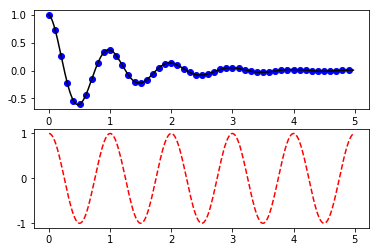

In [18]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)            #e^(-t) * cos(2πt)

t1 = np.arange(0.0, 5.0, 0.1)                        # Numpy用法：0为起点，5为终点，0.1为步进
t2 = np.arange(0.0, 5.0, 0.02)

# plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')               # cos(2πt)

这里的figure（）命令是可选的，因为默认情况下将创建figure（1），如果不手动指定任何轴，默认情况下将创建一个子图（111）。

subplot（）命令指定numrows，numcols，fignum，其中fignum的范围从1到numrows * numcols。 如果numrows * numcols <10，则subplot命令中的逗号是可选的。所以子图（211）与子图（2,1,1）相同。 您可以创建任意数量的子图和轴。 如果要手动放置轴，即不在矩形网格上，请使用axis（）命令，可以将轴指定为轴（[左，底，宽，高]），其中所有值均为小数 （0到1）坐标。 


请参阅pylab_examples示例代码：axes_demo.py，以手动放置轴的示例和pylab_examples示例代码：subplots_demo.py为具有大量子图的示例。


axes_demo.py:http://matplotlib.org/examples/pylab_examples/axes_demo.html#pylab-examples-axes-demo

subplots_demo.py:http://matplotlib.org/examples/pylab_examples/subplots_demo.html#pylab-examples-subplots-demo

### 您可以使用增加figure（）调用多个轴和子图：

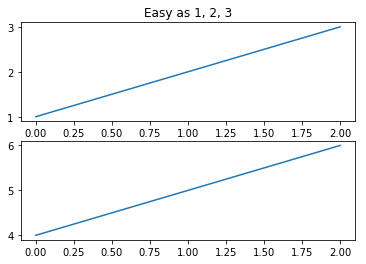

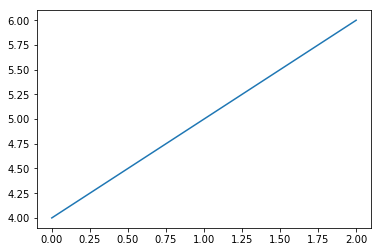

In [30]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])          #subplot(mnz)  m行n列z为序号
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

# 标注文字


text（）命令可用于在任意位置添加文本，并使用xlabel（），ylabel（）和title（）在指定位置添加文本（有关更详细的示例，请参阅文本简介）

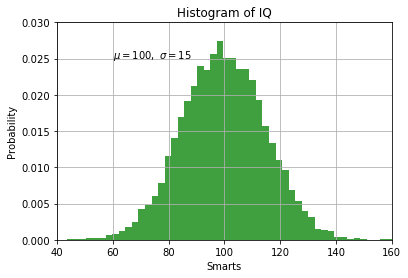

In [33]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# 创造直方图
n, bins, patches = plt.hist(x, 50, normed=1 , facecolor='g', alpha=0.75)


plt.xlabel('Smarts')                     #标注横坐标
plt.ylabel('Probability')                #标注纵坐标
plt.title('Histogram of IQ')                            #标注题目
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')                 #注释
plt.axis([40, 160, 0, 0.03])                    
plt.grid(True)                                 #打开栅格
plt.show()

In [ ]:
# ?plt.hist

#### 注释

上面的基本的text（）命令的使用将文本放在Axes的任意位置。 文本的常见用途是注释绘图的某些特征，而annotate（）方法提供了帮助器功能，使注释变得容易。 在注释中，有两点要考虑：由参数xy表示的注释位置和文本xytext的位置。 这两个参数都是（x，y）元组。

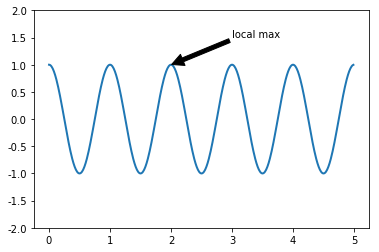

In [34]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.01)
            )

plt.ylim(-2,2)
plt.show()

## 对数等非线性轴

matplotlib.pyplot不仅支持直线轴刻度，还支持对数和对数刻度。 如果数据跨越许多数量级，这是常用的。 更改轴的刻度很容易：

plt.xscale（“log”）

具有相同数据和y轴不同尺度的四个图的示例如下所示。

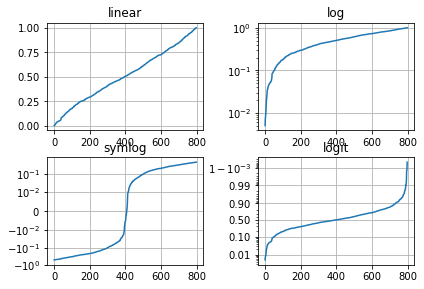

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()